# Grover's Algorithm

# 1) Introduction

Grover's algorithm is useful for searching an unstructured database with N elements. For instance,you have a phone number and want to find the corresponding name associated to this phone number, since it is unstructured you need to check every element (in the worst case scenario), but if you have the solution it is easy to check, this shows that the problem is NP.

In order to show Grover's algorithm we need to rephrase as an oracle problem: Labelling each element of the database $\{0,1, \dots, N-1 \}$ and $x_0$ the unknown marked item. The oracle $f$ computes the following binary function:

$$
    f: \{0,1 \}^N \rightarrow \{0,1 \} \hspace{1em} , \hspace{1em} \mathrm{with} \hspace{2em} f(x) = \begin{cases}
    1, & \text{if } x=x_0\\
    0, & \text{otherwise}
\end{cases}
$$

For a classical computer, the probability to find $x_0$ is $\frac{1}{N}$ , so to find $x_0$ with probability $p$ is needed $p N = \mathcal{O}(N)$ oracle queries. Grovers showed that on a quantum computer we can have a quadratic speedup, then we will need $\mathcal{O}(\sqrt{N})$ queries. This is not massive, but we can compare this speedup with the breakthrough that Fast Fourier Transform(FFT) did for signalling processing.

# 2) General Algorithm

## 2.1) Algorithm

Here we suppose a quantum oracle with the ability to recognize solutions to the search problem. This recognition is signaled by making use of an oracle qubit. More precisely:

$$

    | x \rangle | q \rangle  \xrightarrow[]{O} | x \rangle | q \oplus f(x) \rangle
$$

The oracle $| q \rangle$ is a single qubit which is flipped if $f(x) = 1$ and is unchanged otherwise. We can check if whether x is a solution by preparing $| x \rangle| 0 \rangle$ and seeing if the oracle qubit flips when using the oracle.

It is common to use $| q \rangle = \frac{1}{\sqrt{2}} \big( | 0 \rangle - | 1 \rangle \big)$. The action of the oracle is:

$$
    | x \rangle \frac{1}{\sqrt{2}} \big( | 0 \rangle - | 1 \rangle \big) \xrightarrow[]{O} (-1)^{f(x)} | x \rangle \frac{1}{\sqrt{2}} \big( | 0 \rangle - | 1 \rangle \big)
$$

Using this type of oracle qubit it remains the same when applying the oracle and can be omitted from the following steps of the algorithm. With this convention: 

\begin{equation}
     | x \rangle \xrightarrow[]{O} (-1)^{f(x)}| x \rangle
\end{equation}

The oracle marks the solution by shifting the phase. For a N item search problem with M solutions, we need to apply the search oracle $O(\sqrt{\frac{N}{M}})$ times in order to obtain the solution.


The algorithm with the Grover operator G is the following:


<figure>
<p style="text-align:center;">
<img src=Figures/GroverCircuit.jpg>
</p>
<p style="text-align:center;">Figure 1: Circuit for the Grover Algorithm, the unitary G are called Grover Iterations or Grover Operator</p>
</figure>

The algorithm begins with $| 0 \rangle^{\otimes N}$. The Haddamard transform put in the equal superposition state, which we call $| \psi \rangle}$:

$$
    | \psi \rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} | x \rangle
$$

The algorithm consists of repeated applications of the grover operator G. This subroutine can be broken up into 4 steps:

(1): Apply the oracle O. 

(2): Apply the Haddamard transform $H^{\otimes N}$.

(3): Perform a conditional phase shift on the computer, with every computational basis state except $| 0 \rangle$ receiving a phase shift of -1: $| x \rangle \xrightarrow[]{M} -(-1)^{\delta_{x0}} | x \rangle$.

(4): Apply the Haddamard transform $H^{\otimes N}$.


The circuit for the Grover operator is the following:

<figure>
<p style="text-align:center;">
<img src=Figures/GroverOperator.jpg>
</p>
<p style="text-align:center;">Figure 2: Circuit for the Grover Operator G.</p>
</figure>

This operator for the conditional phase shift on step (2) is simply $M = 2 | 0 \rangle \langle 0 | - I$, because we have:

$$
    M = \begin{pmatrix}
    2-1 & 0  & \dots & 0 \\
    0   & -1 & \dots & 0 \\
    \vdots & \ddots & \vdots & \vdots \\
    0 & \dots & 0 & -1 
    \end{pmatrix}
$$

Steps 2 and 4 needs $n=\log(N)$ operations each. Step 3, the conditional phase shift, can be implemented using $O(n)$ gates. But the cost of the Oracle depends on the application, on the bright side, we only need to call the oracle once. The steps 2,3,4 combined are: 

\begin{equation}
    H^{\otimes n} \big( 2 | 0 \rangle \langle 0 | - I \big) H^{\otimes n} = 2 | \psi \rangle \langle \psi |
\end{equation}

Where $| \psi \rangle$ is the weighted superposition. Thus: $G = \big( 2| \psi \rangle \langle \psi | - I \big) O $. Let's see how the operator $ 2| \psi \rangle \langle \psi | - I $ acts on an arbitrary state: $| \eta \rangle = \sum_k \alpha_k | k \rangle $:


$$
\begin{split}
    \bigg( 2| \psi \rangle \langle \psi | - I \bigg) | \eta \rangle & = \bigg( 2| \psi \rangle \langle \psi | - I \bigg) \sum_k \alpha_k |k \rangle \\ 
    & = \bigg[ \frac{2}{N} \sum_{x,y} | x \rangle \langle y | - I \bigg] \sum_k \alpha_k |k \rangle = \frac{2}{N} \sum_{x,y,k} \alpha_k | x \rangle \langle y | | k \rangle - \sum_k \alpha_k | k \rangle \\
    & = \frac{2}{N} \sum_{x,k} \alpha_k | x \rangle - | \eta  \rangle  = 2 \overbrace{\sum_{k} \frac{\alpha_k}{N}}^{\equiv \langle \alpha \rangle} \sum_x | x \rangle - | \eta \rangle \\
    & = 2 \sum_x \langle \alpha \rangle | x \rangle - \sum_k \alpha_k | k \rangle = \sum_k \bigg[ - \alpha_k + 2 \langle \alpha \rangle \bigg] | k \rangle
\end{split}    
$$

For this reason, sometimes this operator is called the inversion about the mean.

## 2.2) Geometric Representation

We can have a geometric visualization of the algorithm that will help us to show that the algorithm needs $O(\sqrt{N})$ gates, for this we want to show that the Grover Operator can be regarded as a rotation in the 2D space spanned by the starting vector $|\psi \rangle$ and the state with the uniform superposition of solutions to the search problem. We adopt the convention$\sum_x^{'}$ to be the sum over all x which are solutions to the search problem, and $\sum_x''$ to be the sum over all x which are not solutions. We also define the normalized states:

$$
    | \alpha \rangle \equiv \frac{1}{\sqrt{N-M}} \sum_x '' |x \rangle \ \ \ \ | \beta \rangle \equiv \frac{1}{\sqrt{M}} \sum_x ' | x \rangle
$$

We can rewrite $| \psi \rangle$ in terms of $| \alpha \rangle$ and $ | \beta \rangle$:

$$
    \begin{split}
    | \psi \rangle & =  \frac{1}{\sqrt{N}} \sum_x | x \rangle = \frac{1}{\sqrt{N}} \bigg( \sum_x ' | x \rangle + \sum_x '' | x \rangle \bigg)  \\
     & = \frac{1}{\sqrt{N}} \bigg( \sqrt{M} | \beta \rangle + \sqrt{N-M} | \alpha \rangle \bigg) \\
     & = \sqrt{\frac{N-M}{N}} | \alpha \rangle + \sqrt{\frac{M}{N}} | \beta \rangle
    \end{split}
$$

So that the initial state is spanned by $| \alpha \rangle$ and $| \beta \rangle$. The effect of G can be understood in a beautiful way by showing that the oracle $O$ performs a reflection about the vector $| \alpha \rangle$ and $| \beta \rangle$. That is:

$$
    O ( a |\alpha \rangle + b | \beta \rangle) = a | \alpha \rangle - b | \beta \rangle
$$

Similarly, $2 |\psi \rangle \langle \psi | - I$ also performs a reflection in the plane about the vector $|\psi \rangle$. The product of two reflections is a rotation!

Thus $G^k| \psi \rangle$ remains in the space spanned by $|\alpha \rangle$ and $|\beta \rangle$. Let $\cos \big( \frac{\theta}{2} \big) = \sqrt{\frac{N- M}{N}}$, so that $|\psi \rangle = \cos \frac{\theta}{2} |\alpha \rangle + \sin \frac{\theta}{2} |\beta\rangle$. Let's see what happens on a grover iteration:

<p style="text-align:center;"><img src=Figures/Grover.jpg></p>
<p style="text-align:center;">Figure 3: Geometric representation of the Grover Iteration</p>


We see from the figure that:

$$
    G | \psi \rangle = \cos \frac{3 \theta}{2} | \alpha \rangle + \sin \frac{3 \theta}{2} | \beta \rangle
$$

So the rotation is equal to $\theta$. It follows that after k iterations of G, we have:

$$
    G^k | \psi \rangle = \cos \bigg( \frac{2k + 1}{2} \theta \bigg) | \alpha \rangle + \sin \bigg( \frac{2k + 1}{2} \theta \bigg) | \beta \rangle
$$

Thus, in the $\{ | \alpha \rangle, | \beta \rangle \}$ basis, we can write the Grover iteration as:

$$
    G = \begin{bmatrix}
    \cos \theta & - \sin \theta \\
    \sin \theta & \cos \theta
    \end{bmatrix}
$$

Where $\theta \in [0, \frac{\pi}{2}]$ and $\sin \theta = \sin \bigg( \frac{\theta}{2} + \frac{\theta}{2} \bigg) = 2 \sin \frac{\theta}{2} \cos \frac{\theta}{2} \Rightarrow \sin \theta = 2 \frac{\sqrt{M(N-M)}}{N}$

In conclusion, the grover iteration acts as a rotation towards $| \beta \rangle$ in the space spanned by $\{ | \alpha \rangle, | \beta \rangle \}$, so repeated applications of G are required for us to measure $| \beta \rangle$ with high probability.

## 2.3) Performance of the Algorithm

How many times we need to repeat the Grover operator in order to rotate $|\psi \rangle$ near $| \beta \rangle$?

The initial system starts with $|\psi \rangle = \sqrt{\frac{N-M}{N}} | \alpha \rangle + \sqrt{\frac{M}{N}} | \beta \rangle$, so rotating through $\arccos \sqrt{\frac{M}{N}}$ radians takes the system to $| \beta \rangle$. Let denote the closest integer to the real number $x$ as $\mathrm{CI}(x)$, where we round halves down. Then repeating the grover iteration $ R = \mathrm{CI}\bigg( \frac{\arccos \sqrt{\frac{M}{N}}}{\theta} \bigg)$ times rotates $|\psi \rangle$ within an angle $\frac{\theta}{2} \leq \frac{\pi}{4}$ of $| \beta \rangle$.

Observation of the state in the computational basis then yields a solution to the search problem with a probability at least $\frac{1}{2}$. For specific values of M and N it is possible to achieve higher probability of success. For example, if $M << N$, we have that $\sin \theta \approx \theta$, and thus the angular error in the final state is at most $\frac{\theta}{2} \approx \sqrt{\frac{M}{N}}$, giving probability of at most $\frac{M}{N}$.

The form of R is an exact expression for the query complexity of the search algorithm, but we can have a simpler expression that summarizes the essential behaviour of R. Note that $R \leq \lceil \frac{\pi}{2 \theta} \rceil$, because $\arccos \sqrt{\frac{M}{N} \leq \frac{\pi}{2}}$, so we can give an upper bound on R. Firstly we assume $M \leq \frac{N}{2}$, thus $\frac{\theta}{2} \geq \sin \frac{\theta}{2} = \sqrt{\frac{M}{N}}$. Then we have a upper bound for R:

\begin{equation}
    R \leq \bigg\lceil \frac{\pi}{4} \sqrt{\frac{
    N}{M}} \ \bigg\rceil
\end{equation}

Thus, $R = O\big( \sqrt{\frac{N}{M}} \big)$ oracle calls must be performed in order to obtain a solution with high probability. We have a polynomial speed-up over the classical algorithm.

We only considered the case when $M < \frac{N}{2}$, what happens if this is not the case? In this case the angle $\theta$ gets smaller and we need more interactions as M increases. But since we expect to be easy to find a solution ( because $M \geq \frac{N}{2}$ ) we can randomly pick a solution and check if it is a solution using the oracle. This succeeds with probability at least $\frac{1}{2}$, and requires only one query of the oracle, but only works if we know the number of solutions in advance.

If we don't know that $M \geq \frac{N}{2}$. We can double the number of elements in the search space by adding N extra items, none which are solutions. This is done by adding a single qubit $| q \rangle$ to the search index, doubling the numbers of items to be searched to $2N$. A new augmented oracle $O'$ can be constructed in a way that marks an item only if it is a solution to the search problem and the extra bit is set to zero; The new search problem has only M solutions out of $2N$, so using $R = \frac{\pi}{4} \sqrt{\frac{2N}{M}}$ queries of $O'$ we get a solution of high probability, since we are using the Big-O notation  we are ignoring constants that multiply the scaling and we have the same scaling $O \big( \sqrt{\frac{N}{M}} \big$.

# 3) Example for N=4 Qubits

Here I will follow the [Qiskit Book](https://qiskit.org/textbook/ch-algorithms/grover.html) and we will focus on the implementation for $N=4$, but the algorithm implementation is not hard to scale up for any $N$.

The first part of the algorithm is to build an oracle that marks the desired state, let's consider the marked up state $\left| 11 \right>$.

Therefore, we need that the oracle acts as follows:

\begin{equation}
    O \left|s \right> = O \ \frac{1}{2} \ \bigg( \left| 00 \right> + \left| 01 \right> + \left| 10 \right> + \left| 11 \right> \bigg) = \frac{1}{2} \ \bigg( \left| 00 \right> + \left| 01 \right> + \left| 10 \right> - \left| 11 \right> \bigg)
\end{equation}

This is the same as a controled Z gate, that means if your first qubit is $\left| 1 \right>$, then you apply an Z operator on the seccond qubit:

\begin{equation}
    \mathrm{CZ} = \left| 0 \right> \left< 0 \right| \otimes 1 + \left| 1 \right> \left< 1 \right| \otimes Z
\end{equation}



This can be done by the reflection: $D = 2 \left| s \right> \left< s \right| - 1$. 

It can be shown that: $D = H^{2\otimes}D'H^{2\otimes}$, where:

\begin{equation}
    D' = \begin{pmatrix}
    1 &  0  & 0 & 0 \\
    0 & -1  & 0 & 0 \\
    0 &  0 & -1 & 0 \\
    0 &  0 & 0 & -1
    \end{pmatrix}
\end{equation}

Therefore:

\begin{equation}
    D' \left|s\right> = \frac{1}{2} \ \bigg( \left|00\right> - \left|01\right> - \left|10\right> - \left|11\right> \bigg)
\end{equation}

We know that the state $\left| 00 \right>$ is the only one that changes the sign and we also know that we can change the sign of $\left| 11 \right>$ by an CZ gate. The other signs can be changed using Z gates on each qubit, because $Z \left| i\right> = (-1)^i \left|i \right>$.

In [1]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

## Circuit

In [2]:
Q_Reg = Qsk.QuantumRegister(2)
C_Reg = Qsk.ClassicalRegister(2)
Q_Circuit = Qsk.QuantumCircuit(Q_Reg,C_Reg)

In [3]:
#Grover

Q_Circuit.h(Q_Reg);
Q_Circuit.cz(Q_Reg[0],Q_Reg[1]);
Q_Circuit.h(Q_Reg);
Q_Circuit.z(Q_Reg);
Q_Circuit.cz(Q_Reg[0],Q_Reg[1]);
Q_Circuit.h(Q_Reg);

#Measurement

Q_Circuit.barrier(Q_Reg);
Q_Circuit.measure(Q_Reg,C_Reg);

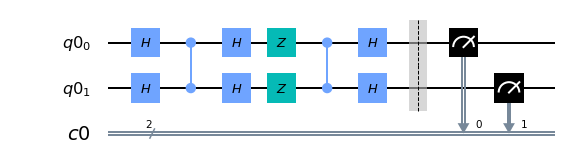

In [4]:
Q_Circuit.draw(output='mpl')

## Simulation

In [5]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(Q_Circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(Q_Circuit)

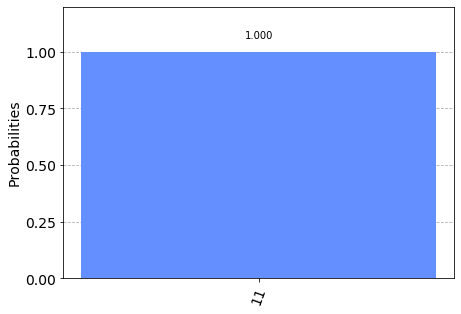

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Running on IBMQ

We will choose the least busy backend with at least two qubits.

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account();
num_qubits = 2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= num_qubits and not x.configuration().simulator and x.status().operational==True))
backend


<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>

Submiting the job for the IBM Q platform

In [8]:
from qiskit.tools.monitor import job_monitor

job_exp = Qsk.execute(Q_Circuit, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [9]:
result_exp = job_exp.result()

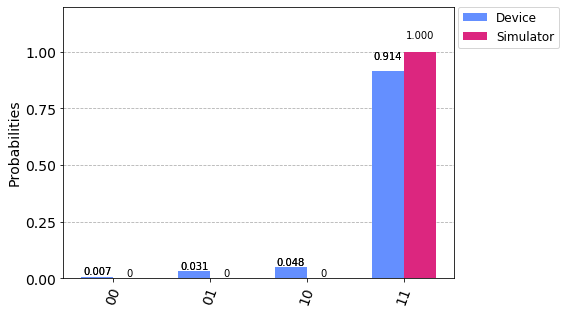

In [10]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(Q_Circuit)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

# References

1 -  Michael A. Nielsen and Isaac L. Chuang.Quantum Computation and Quantum Information:  10th Anniversary Edition.Cambridge University Press, 2010

2 -   Giuliano Benenti, Giulio Casati, and Giuliano Strini.Principles  of  Quantum  Computation  and  Information.  World Scientific, 2004.

3 - [Qiskit Book](https://qiskit.org/textbook/)

--------------------------------------------------------------------------------------

In [11]:
from qiskit.tools.jupyter import *
%qiskit_version_table